In [2]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
base_data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Data.csv")

In [4]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
base_data.shape

(110527, 14)

In [7]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay'], errors='coerce')

# Add a column for the day of the week
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [9]:
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay'], errors='coerce')

# Add a column for the day of the week
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [10]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [11]:
base_data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [12]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [15]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [13]:
#dropping some columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [14]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  int64              
 5   Hipertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handcap         110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  No-show         110527 non-null  object             
 11  sch_weekday     110527 non-null  int32              
 12  app_weekday     110527 non-null  int32              
dtypes: datetime64[

In [15]:
base_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


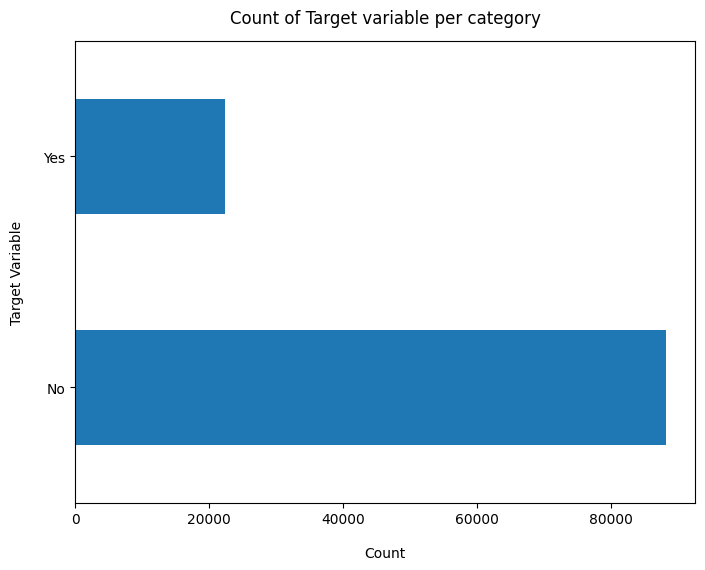

In [16]:
base_data['No-show'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target variable per category", y=1.02);

In [17]:
base_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'sch_weekday', 'app_weekday'],
      dtype='object')

In [18]:
#calculating the % of appointments or not
100*base_data['No-show'].value_counts()/len(base_data['No-show'])

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [19]:
base_data['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

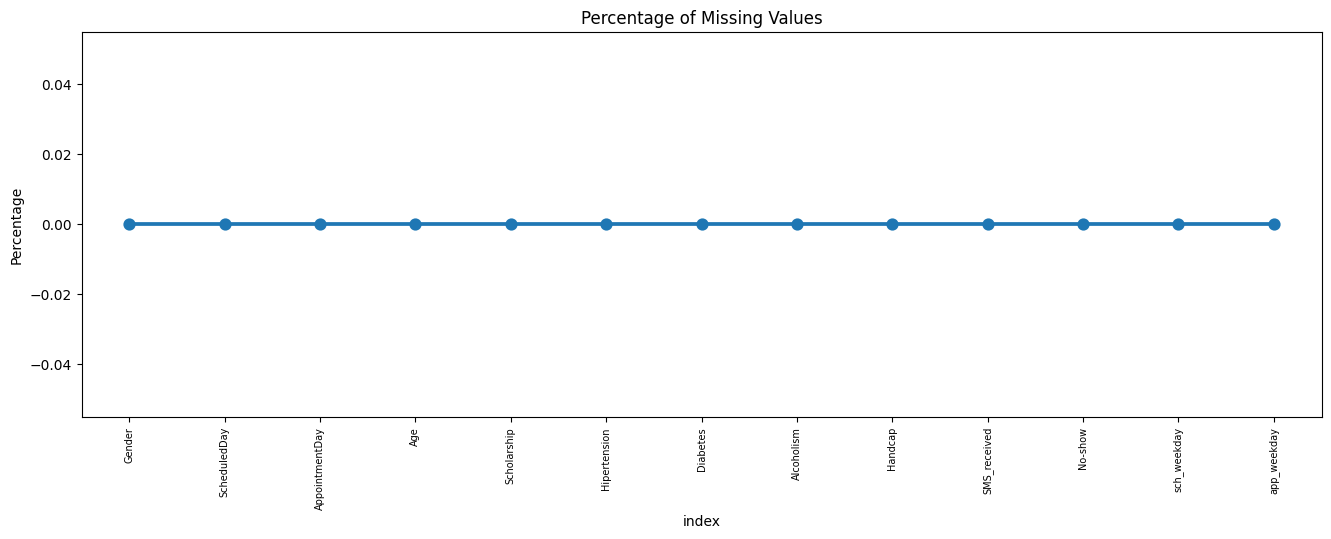

In [20]:
#Having a look that data contains any missing values or not
missing = pd.DataFrame((base_data.isnull().sum()) * 100 / base_data.shape[0]).reset_index()
missing.columns = ['index', 'percentage']  # Rename columns for clarity
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

In [21]:
#Data Cleaning
new_data=base_data.copy()

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Scholarship     110527 non-null  int64              
 5   Hipertension    110527 non-null  int64              
 6   Diabetes        110527 non-null  int64              
 7   Alcoholism      110527 non-null  int64              
 8   Handcap         110527 non-null  int64              
 9   SMS_received    110527 non-null  int64              
 10  No-show         110527 non-null  object             
 11  sch_weekday     110527 non-null  int32              
 12  app_weekday     110527 non-null  int32              
dtypes: datetime64[

In [23]:
#Get max tenure
print(base_data['Age'].max())

115


In [24]:
#Group the tenure in bins of 12 Months
labels = ["{0}-{1}".format(i, i+20) for i in range(1, 118, 20)]

base_data['Age_group']=pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [25]:
base_data.drop(['Age'], axis=1, inplace=True)

In [26]:
#Data exploration
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'sch_weekday',
 'app_weekday',
 'Age_group']

In [ ]:
#having a look into the values of count of each columns and there count in respect to no-show column
for i, predictor in enumerate(base_data.drop(columns=['No-show'])):
    print('-'*10, predictor, '-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='No-show')

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-02 09:53:25+00:00     1
2016-05-30 09:12:28+00:00     1
2016-05-16 09:10:04+00:00     1
2016-05-09 10:17:48+00:00     1
2016-04-27 13:30:56+00:00     1
Name: count, Length: 103549, dtype: int64


In [30]:
base_data['No-show'] = np.where(base_data['No-show'] == 'Yes', 1, 0)

In [31]:
base_data['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

In [32]:
base_data_dummies=pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1-21,Age_group_21-41,Age_group_41-61,Age_group_61-81,Age_group_81-101,Age_group_101-121
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

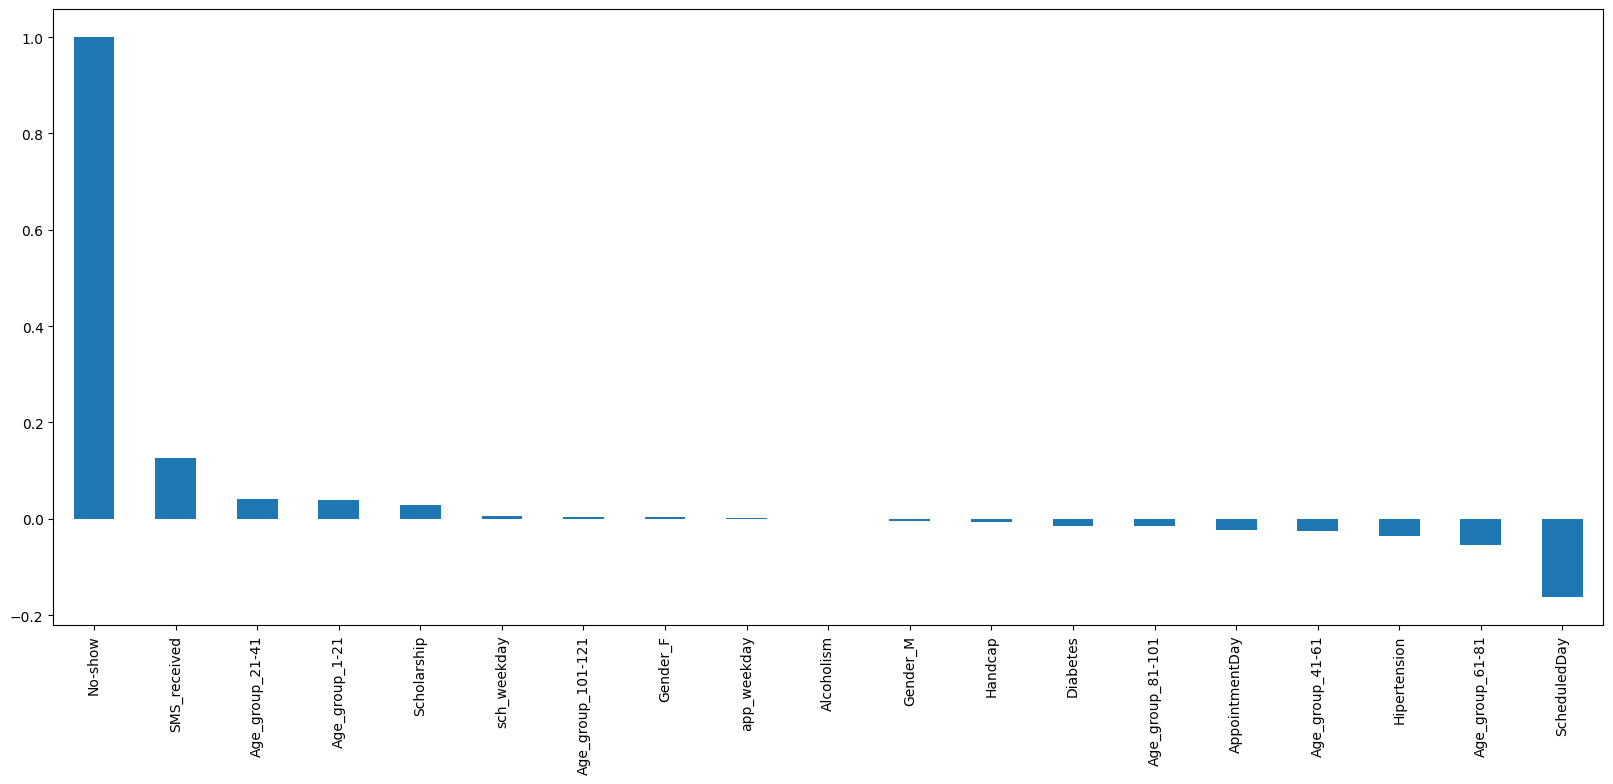

In [33]:
#Build a correlation of all predictors with 'No-show'
plt.figure(figsize=(20,8))
base_data_dummies.corr()['No-show'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

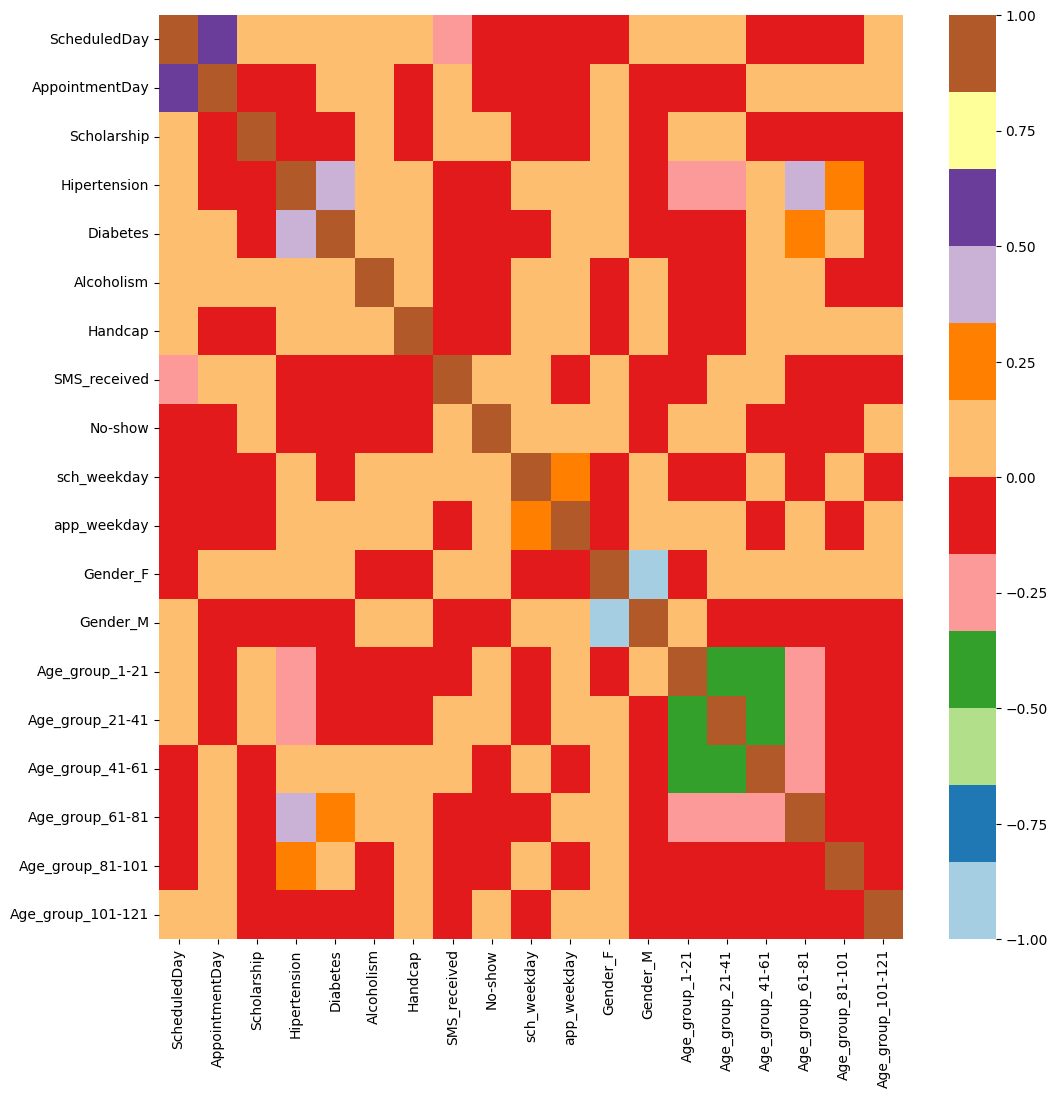

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

In [35]:
#Bivariate Analysis
new_df1_target0=base_data.loc[base_data['No-show']==0]
new_df1_target1=base_data.loc[base_data['No-show']==1]

In [36]:
def uniplot(df,col,title,hue=None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30

    temp=pd.series(data=hue)
    fig, ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue)
    plt.show()

In [ ]:
Findings
1.Female patients has taken more appointments than male patients
2.Ration of Noshow and Show is almost equal for agegroup except Age0 and Age1 with 80% show rate for each age group
2.Each neighbourhood have almost 80% show rate
4.There are 99666 patients without Scholoarship and out of them around 80% have come or the visit and out of the 21801 patients with scholarship around 75%
  of them have come for the visit
5.There are around 88,726 patients with hypertension and out of them around 78% have come for the visit and out of the 21801 patients with Hypertension 
 around 83% of them have come for the visit
6.There are around 102,584 patients without diabetes and out of them around 80% have come for the visit and out of the diabetes around 83% of them have come for the visit
7.There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received
  sms around 72% of them have come for the visit
8.There is no appointments on sunday and on saturday appointments are very less in comparision to other week days